In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.dates as mdates
import datetime as dt
# set random seed
SEED = 321
np.random.seed(SEED)

!pip install holidays
import holidays
from holidays import country_holidays

In [2]:
# get list of files from folder
crime_files = sorted(glob.glob("Data/Chicago/"+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
1,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
2,1309918,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258
3,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
4,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
...,...,...,...,...,...,...,...,...,...,...,...,...
71724,13047140,04/19/2023 12:50:00 PM,BATTERY,SIMPLE,TAVERN / LIQUOR STORE,False,False,725,7.0,16.0,41.768560,-87.663251
71725,13047255,04/19/2023 12:51:00 PM,DECEPTIVE PRACTICE,COMPUTER FRAUD,RESIDENCE,False,False,2514,25.0,31.0,41.932114,-87.762588
71726,13047517,04/19/2023 12:55:00 PM,OTHER OFFENSE,TELEPHONE THREAT,HOSPITAL BUILDING / GROUNDS,False,True,332,3.0,5.0,41.769688,-87.587222
71727,13047228,04/19/2023 12:56:00 PM,OTHER OFFENSE,OTHER WEAPONS VIOLATION,SIDEWALK,True,False,2534,25.0,37.0,41.904462,-87.727043


In [3]:
#Dropping NA rows
df = df.dropna(subset = ["Location Description", "Latitude", "Longitude", "District"])
(df.isna().sum()/len(df)) * 100

ID                      0.00000
Date                    0.00000
Primary Type            0.00000
Description             0.00000
Location Description    0.00000
Arrest                  0.00000
Domestic                0.00000
Beat                    0.00000
District                0.00000
Ward                    7.87528
Latitude                0.00000
Longitude               0.00000
dtype: float64

In [4]:
#Converting date to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7689771 entries, 0 to 71728
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 660.0+ MB


/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_40826/1485330390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


In [6]:
## feature engineering for dates
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()
df['day of month'] = df['Date'].dt.day
df['day of week'] = df['Date'].dt.day_name()
df['hour'] = df['Date'].dt.hour
df.head()

/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_40826/2620385095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Date'].dt.year
/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_40826/2620385095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].dt.month_name()
/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_40826/2620385095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year,month,day of month,day of week,hour
0,1311123,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,2001,January,1,Monday,1
1,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,2001,January,1,Monday,1
2,1309918,2001-01-01 01:00:00,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258,2001,January,1,Monday,1
3,1323691,2001-01-01 01:00:00,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513,2001,January,1,Monday,1
4,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001,January,1,Monday,1


In [10]:
df['hour'].value_counts(ascending = False)

12    438279
19    434979
20    433461
0     428359
18    421788
21    420828
22    413953
15    409936
17    396228
16    389274
14    388062
13    365290
23    344410
11    340842
9     328422
10    324835
8     259195
1     245044
2     206781
7     176113
3     167265
4     127157
6     123173
5     106097
Name: hour, dtype: int64

In [11]:
#Setting date as index
df = df.set_index("Date")
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year,month,day of month,day of week,hour
Date,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1311123,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,2001,January,1,Monday,1
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,2001,January,1,Monday,1
2001-01-01 01:00:00,1309918,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258,2001,January,1,Monday,1
2001-01-01 01:00:00,1323691,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513,2001,January,1,Monday,1
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001,January,1,Monday,1


### 1) Comparing Police Districts:
- Which district has the most crimes? Which has the least

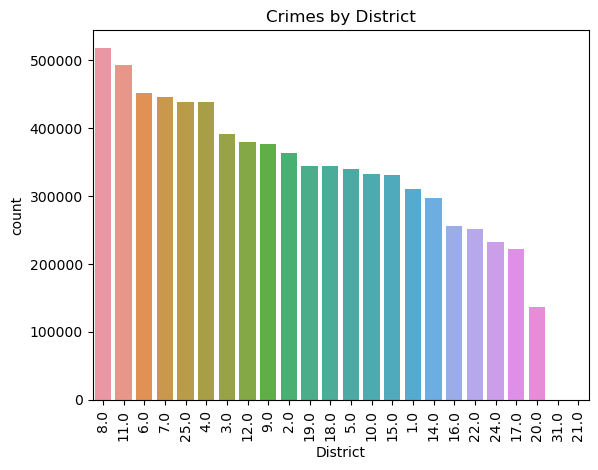

In [12]:
sns.countplot(data = df, 
              x = "District",
             order = df["District"].value_counts().index).set(title = "Crimes by District")

plt.xticks(rotation = 90)

plt.show()

#### District 8 has the most crime. And District 31 and 21 have the lowest crime.

### 2) Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [13]:
crime_trends = df.copy()
crime_trends["year"] = df.index.year

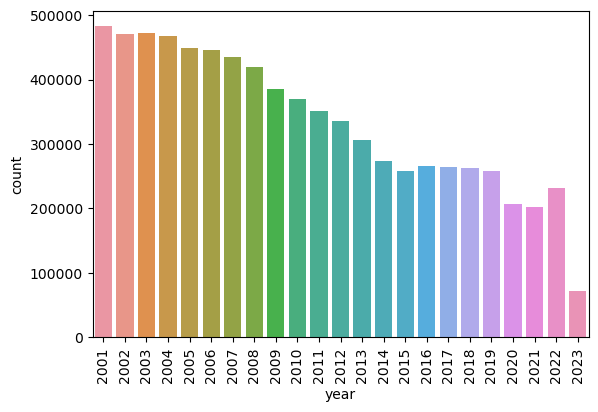

In [15]:
ax = sns.countplot(data=crime_trends, x='year')
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90, ha = "center")

### Crime over the years for the most part are decreasing as a whole.

In [16]:
crimes = {}
for crime in crime_trends["Primary Type"].unique():
    temp_filter = crime_trends["Primary Type"] == crime
    temp_df = crime_trends[temp_filter]
    crimes[crime] = temp_df
crimes.keys()

dict_keys(['CRIMINAL DAMAGE', 'BATTERY', 'THEFT', 'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'OTHER OFFENSE', 'PUBLIC PEACE VIOLATION', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'BURGLARY', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'NARCOTICS', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CRIMINAL SEXUAL ASSAULT', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'HUMAN TRAFFICKING', 'NON - CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION'])

/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_40826/3442782246.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


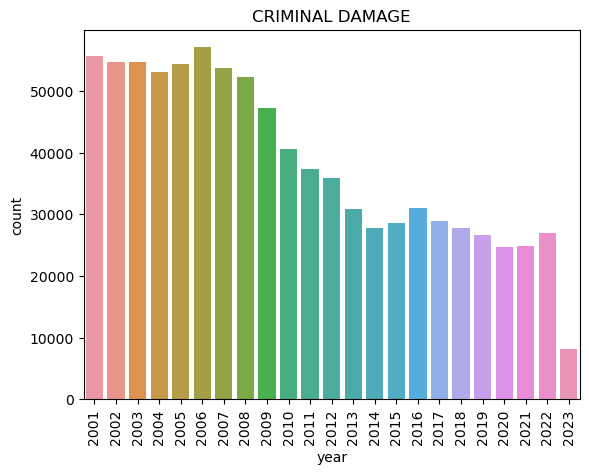

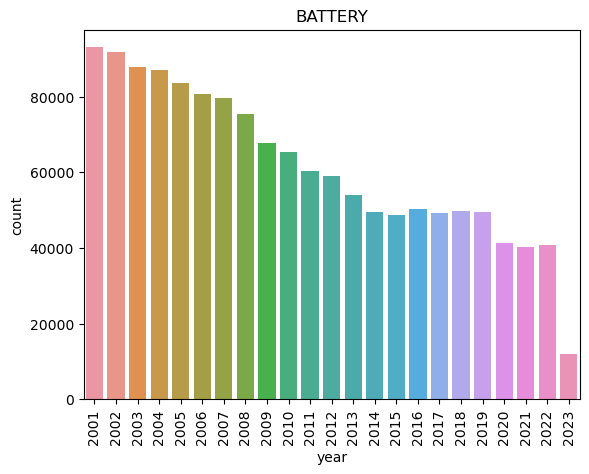

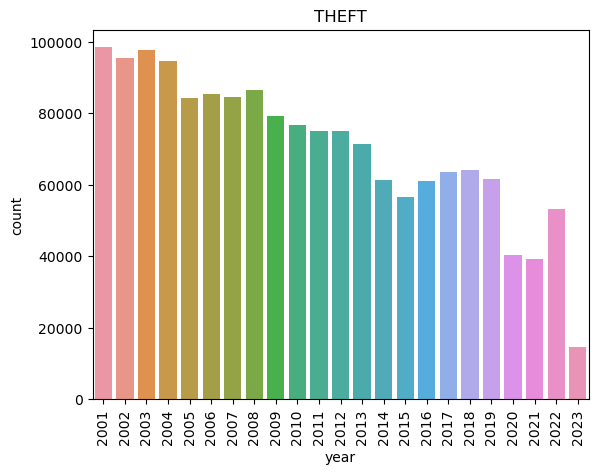

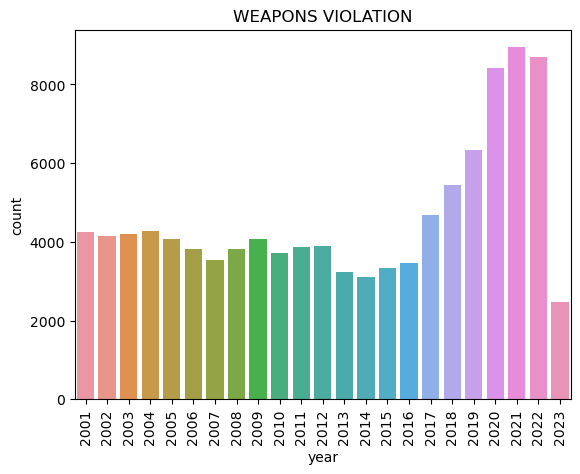

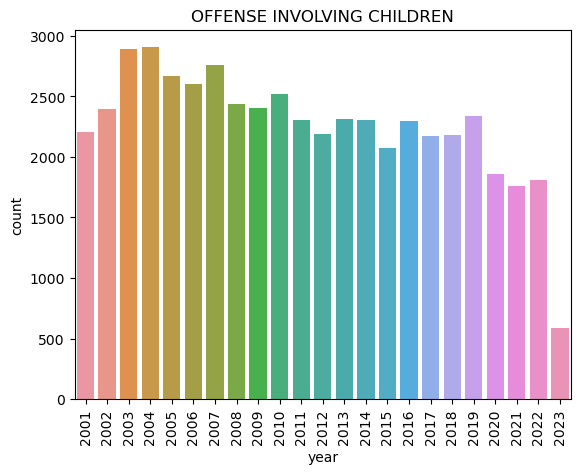

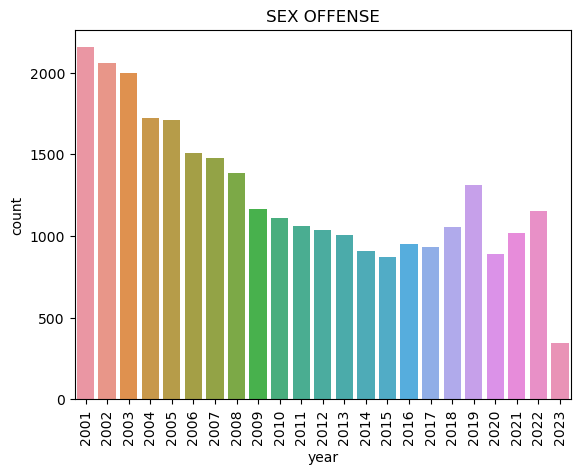

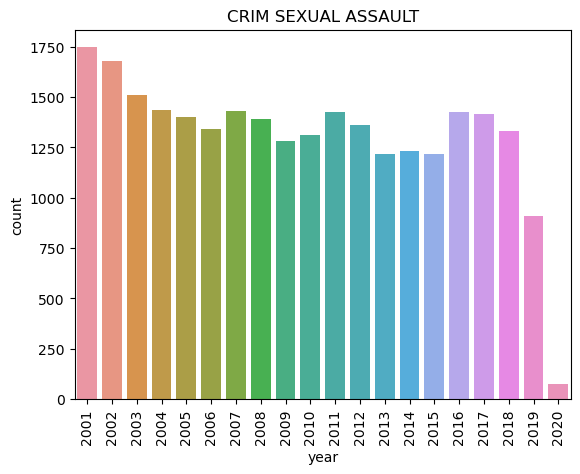

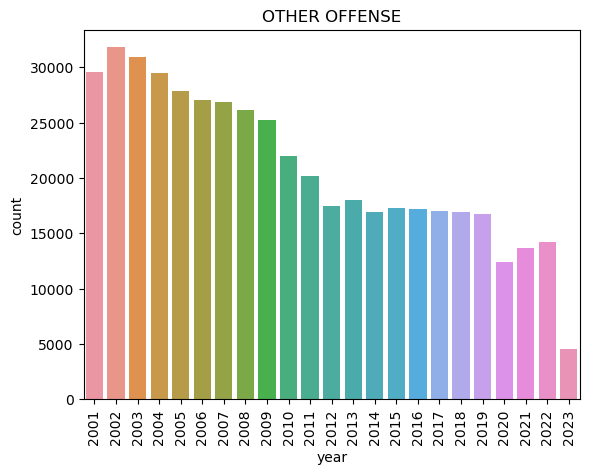

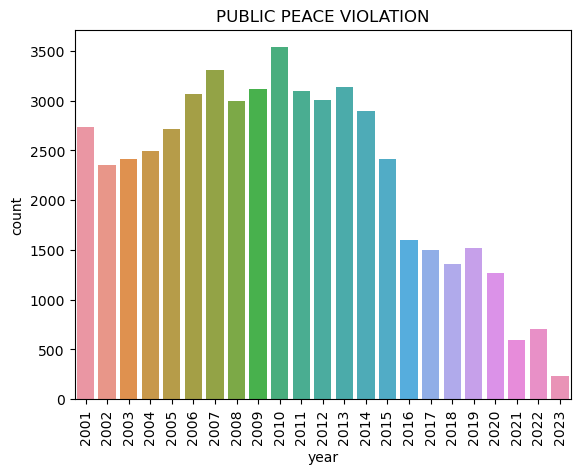

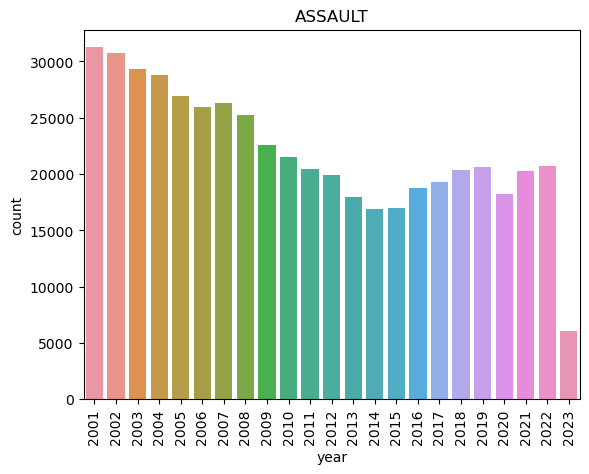

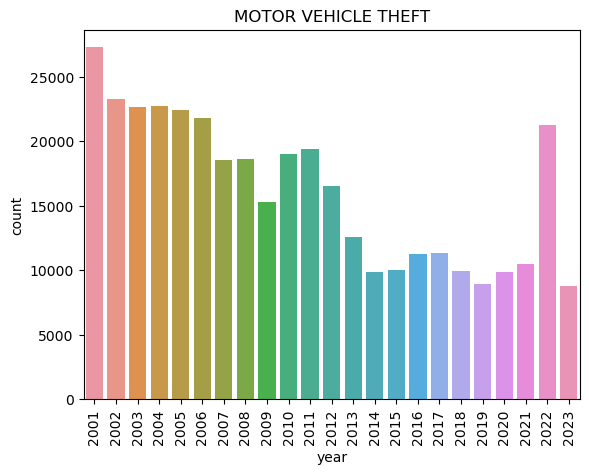

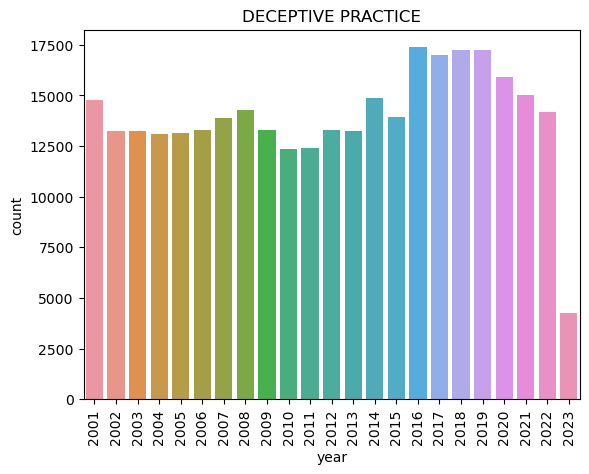

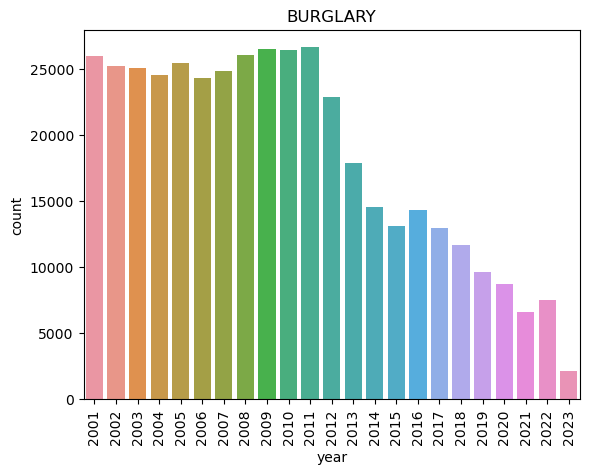

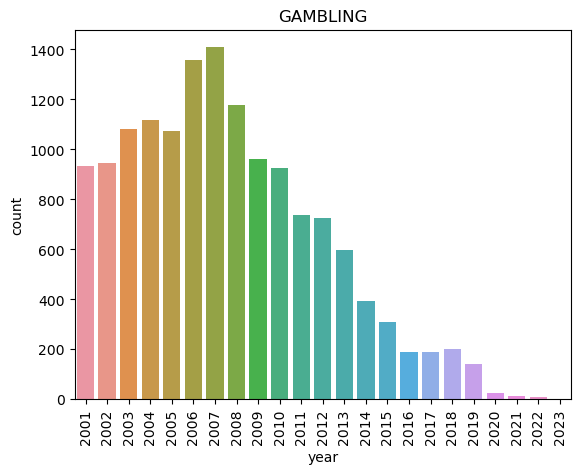

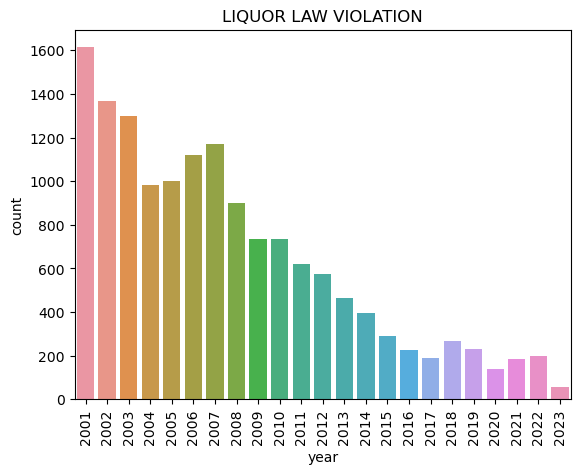

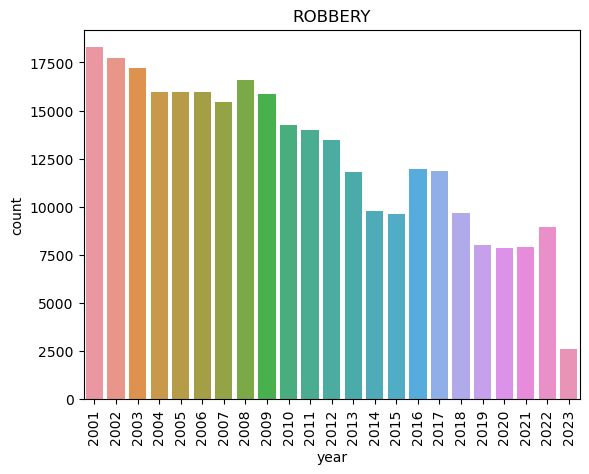

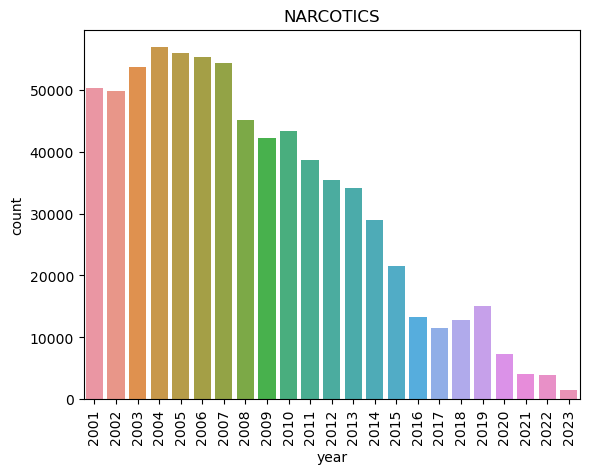

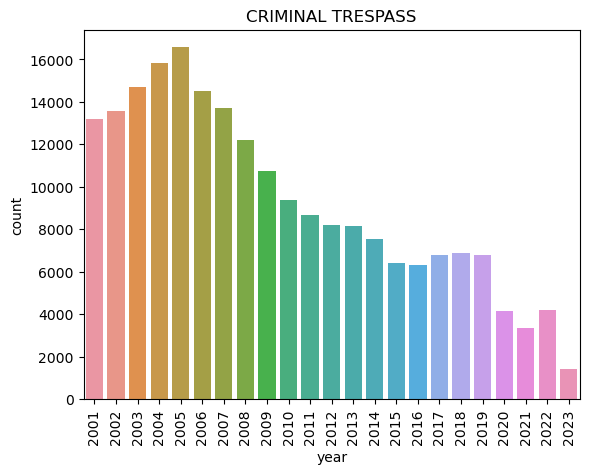

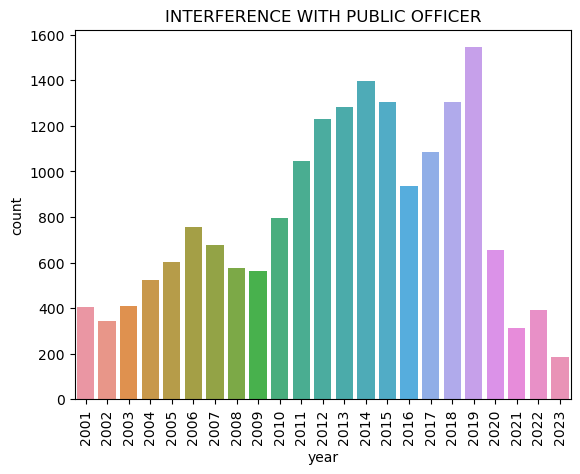

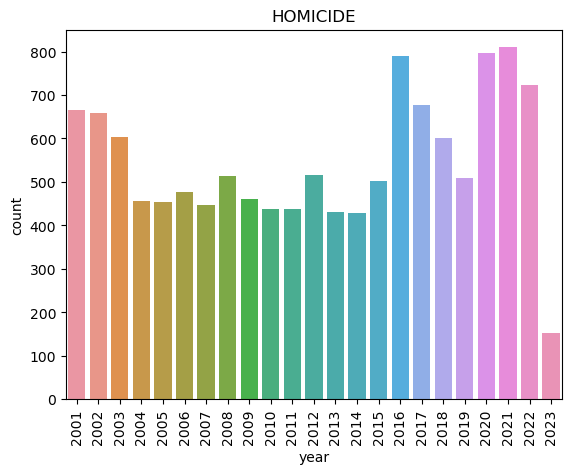

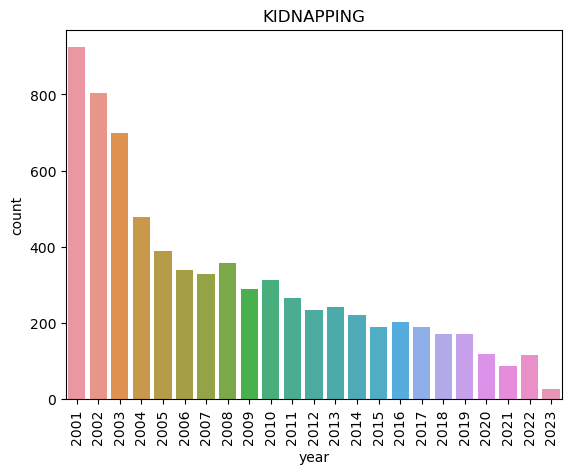

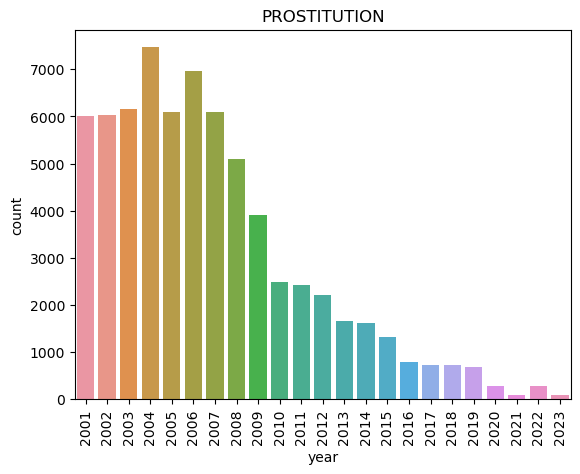

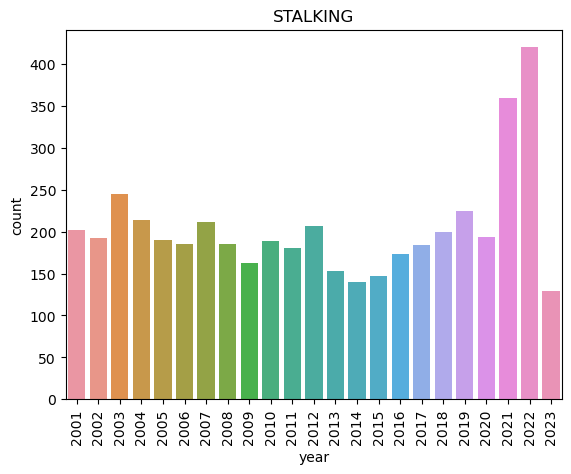

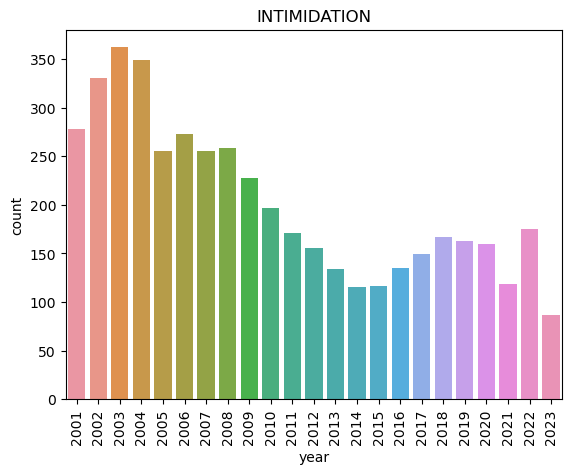

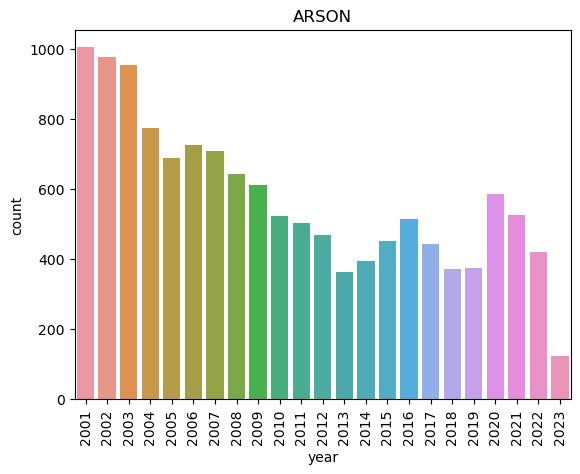

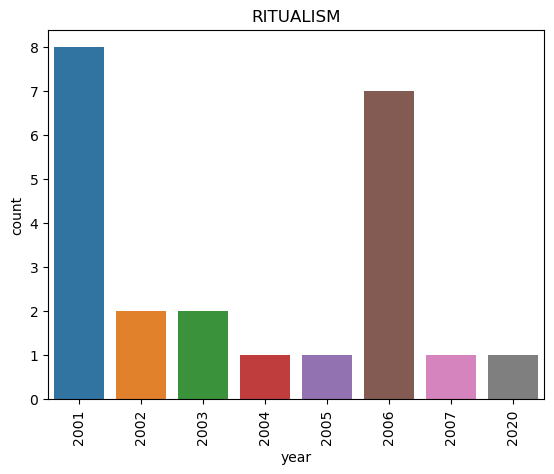

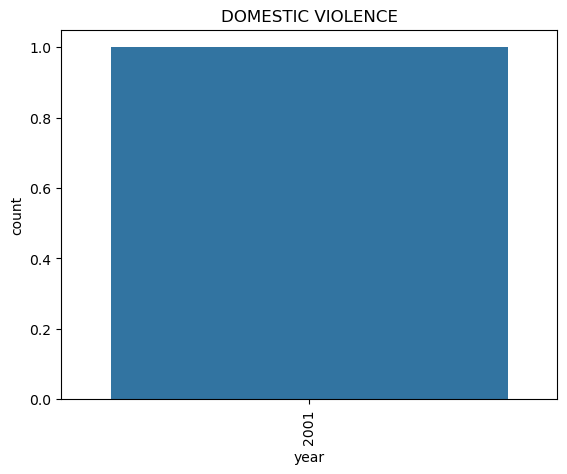

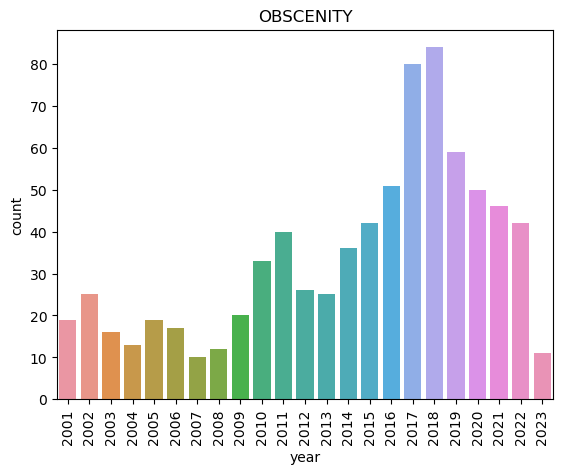

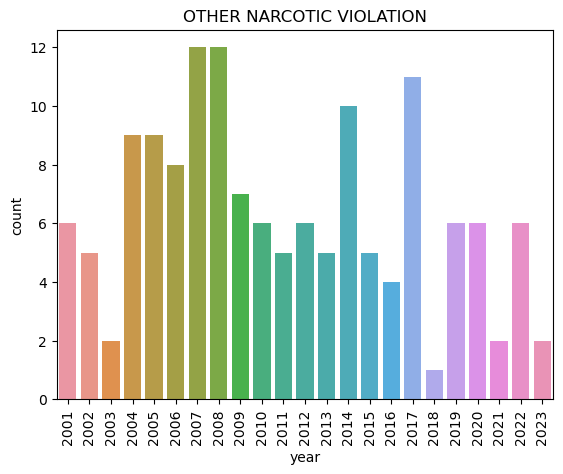

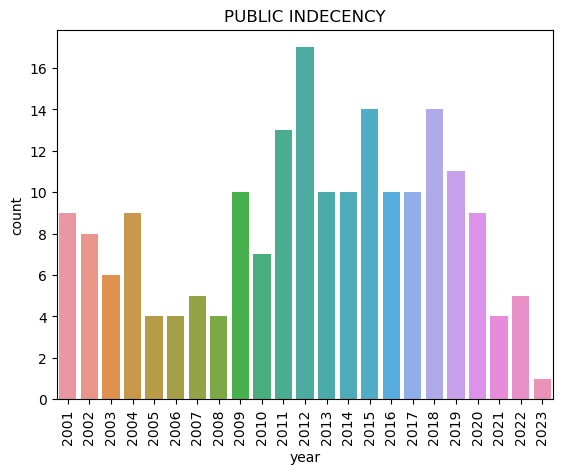

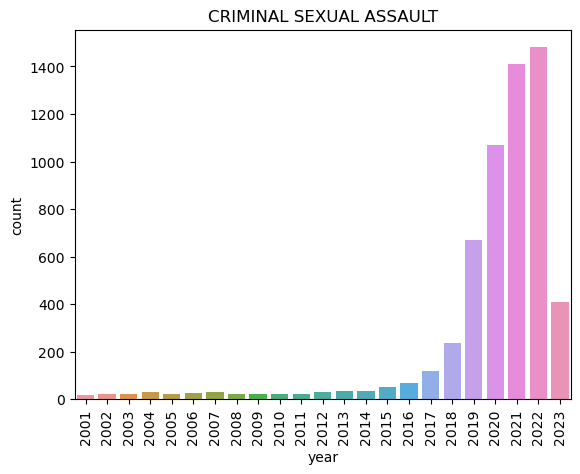

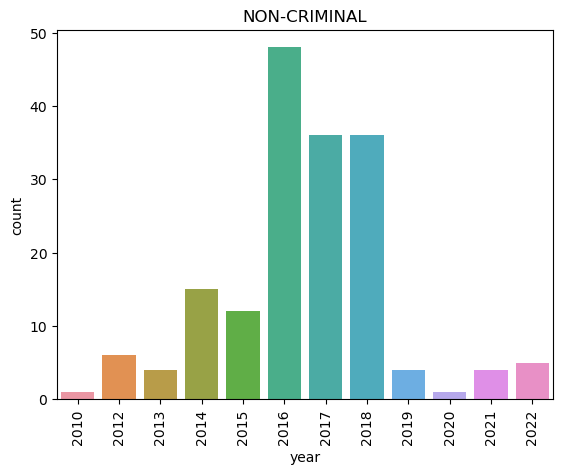

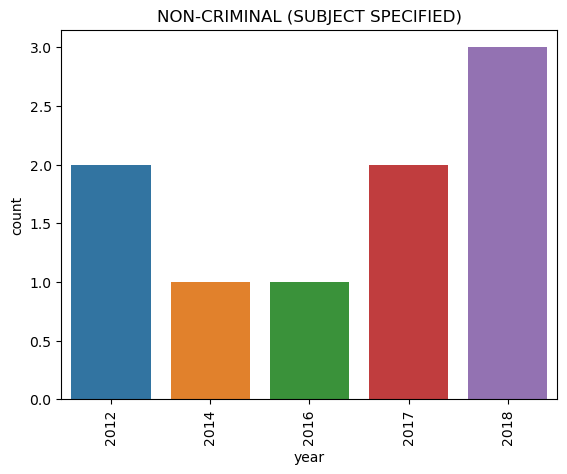

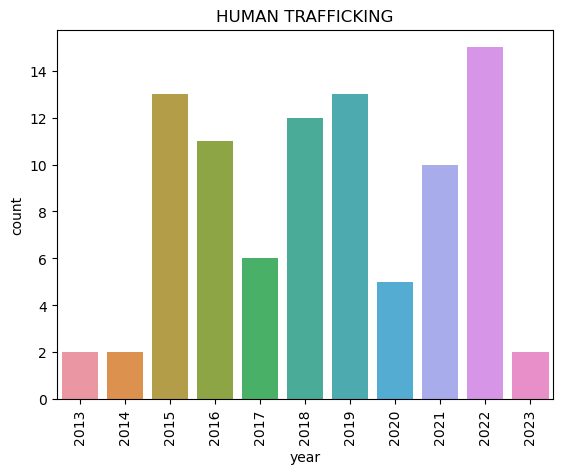

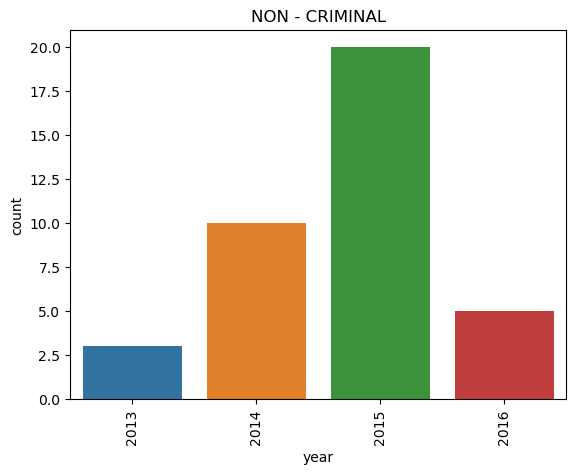

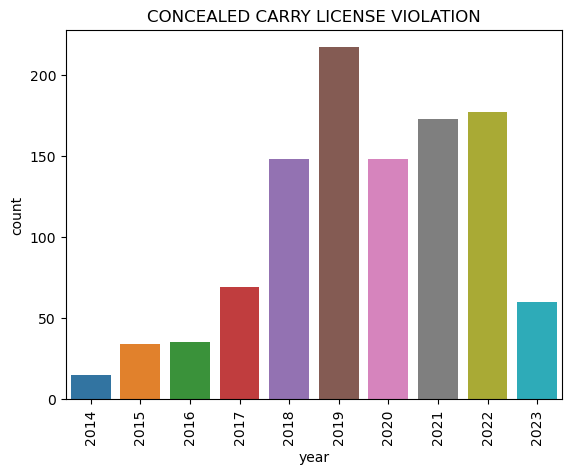

In [18]:
for key in crimes.keys():
    plt.figure()
    ax = sns.countplot(data=crimes[key], x='year').set(title = f"{key}")
    
    plt.xticks(rotation = 90)

## Are any crimes increasing over the years?

### Crimes that increase:

- Weapons Violations
- Interference with Public Officer
- Stalking
- Obscenity
- Criminal Sexual Assault
- Human Trafficking
- Concealed Carry License Violations

### Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [32]:
monthly_crime_df = df.copy()

In [33]:
monthly_crime_df["Month"] = df.index.month
monthly_crime_df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year,month,day of month,day of week,hour,Month
Date,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1311123,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909,2001,January,1,Monday,1,1
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,2001,January,1,Monday,1,1
2001-01-01 01:00:00,1309918,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,19.0,NaN,41.940001,-87.654258,2001,January,1,Monday,1,1
2001-01-01 01:00:00,1323691,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513,2001,January,1,Monday,1,1
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001,January,1,Monday,1,1


In [34]:
#Dropping unnecessary columns
drop_cols = ["ID", "Description", "Location Description", "Arrest", 
             "Domestic", "Beat", "District", "Ward", "Latitude", "Longitude"]
monthly_crime_df = monthly_crime_df.drop(columns = drop_cols)
monthly_crime_df.head()

,Primary Type,year,month,day of month,day of week,hour,Month
Date,,,,,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,2001,January,1,Monday,1,1
2001-01-01 01:00:00,BATTERY,2001,January,1,Monday,1,1
2001-01-01 01:00:00,THEFT,2001,January,1,Monday,1,1
2001-01-01 01:00:00,WEAPONS VIOLATION,2001,January,1,Monday,1,1
2001-01-01 01:00:00,BATTERY,2001,January,1,Monday,1,1


In [36]:
#Selecting data until 2023
monthly_crime_df = monthly_crime_df.loc[:"2022"]
print(monthly_crime_df.head(), monthly_crime_df.tail())

                          Primary Type  year    month  day of month  \
Date                                                                  
2001-01-01 01:00:00    CRIMINAL DAMAGE  2001  January             1   
2001-01-01 01:00:00            BATTERY  2001  January             1   
2001-01-01 01:00:00              THEFT  2001  January             1   
2001-01-01 01:00:00  WEAPONS VIOLATION  2001  January             1   
2001-01-01 01:00:00            BATTERY  2001  January             1   

                    day of week  hour  Month  
Date                                          
2001-01-01 01:00:00      Monday     1      1  
2001-01-01 01:00:00      Monday     1      1  
2001-01-01 01:00:00      Monday     1      1  
2001-01-01 01:00:00      Monday     1      1  
2001-01-01 01:00:00      Monday     1      1                             Primary Type  year     month  day of month  \
Date                                                                   
2022-12-31 00:45:00  CRIMINAL

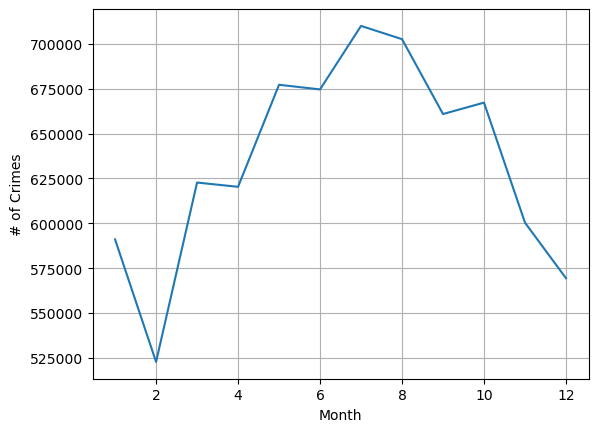

In [37]:
## save month counts
month_counts = monthly_crime_df["Month"].value_counts().sort_index()
month_counts.plot(style='-',grid=True,ylabel='# of Crimes', xlabel='Month');

In [38]:
month_counts.sort_values(ascending = False)

7     709942
8     702569
5     677152
6     674565
10    667202
9     660857
3     622680
4     620297
11    600329
1     590990
12    569387
2     522740
Name: Month, dtype: int64

In [39]:
crimes = {}
for crime in monthly_crime_df["Primary Type"].unique():
    temp_filter = monthly_crime_df["Primary Type"] == crime
    temp_df = monthly_crime_df[temp_filter]
    crimes[crime] = temp_df
crimes.keys()

dict_keys(['CRIMINAL DAMAGE', 'BATTERY', 'THEFT', 'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'SEX OFFENSE', 'CRIM SEXUAL ASSAULT', 'OTHER OFFENSE', 'PUBLIC PEACE VIOLATION', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'BURGLARY', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'NARCOTICS', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CRIMINAL SEXUAL ASSAULT', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'HUMAN TRAFFICKING', 'NON - CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION'])

/var/folders/lk/ky72q70x07dg6dkvyns7_9480000gn/T/ipykernel_40826/410735303.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


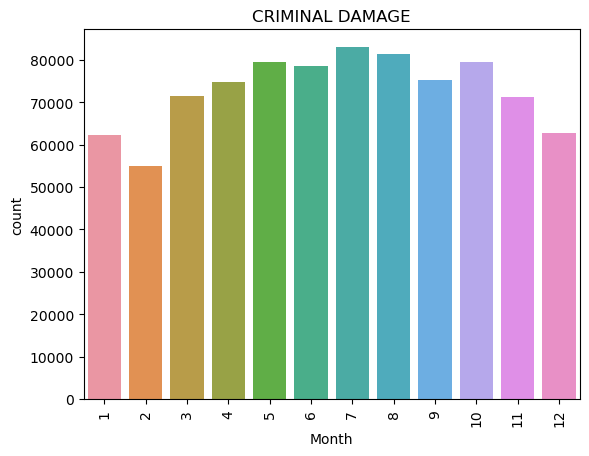

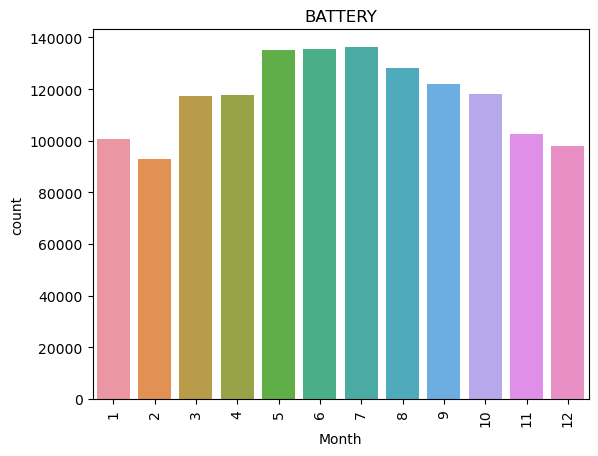

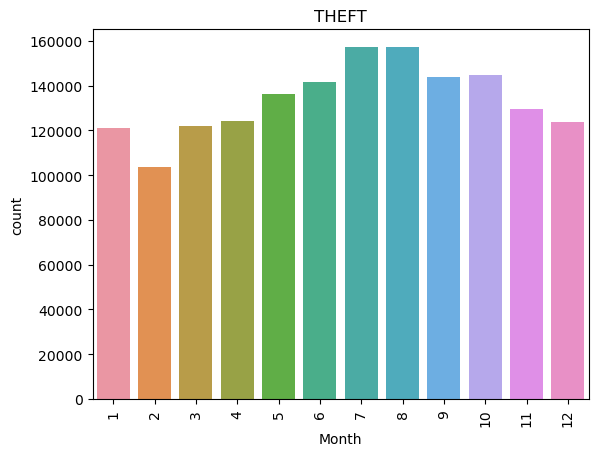

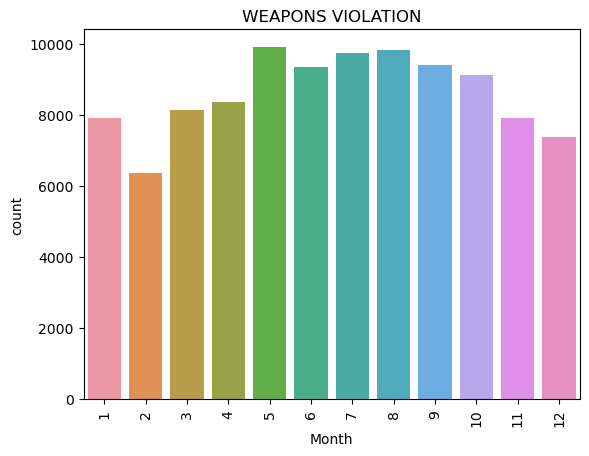

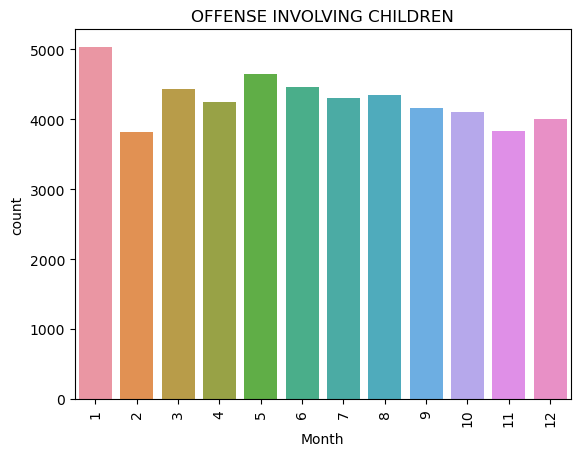

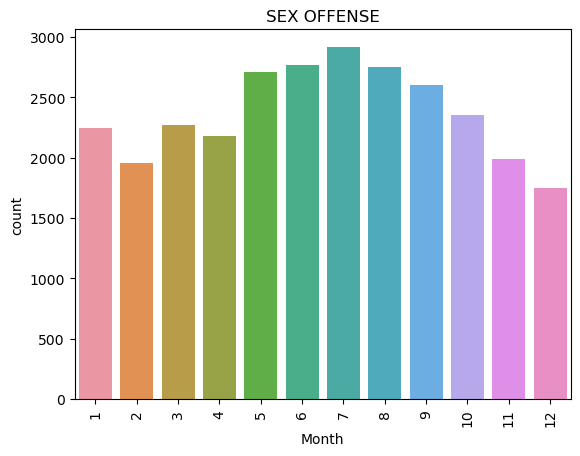

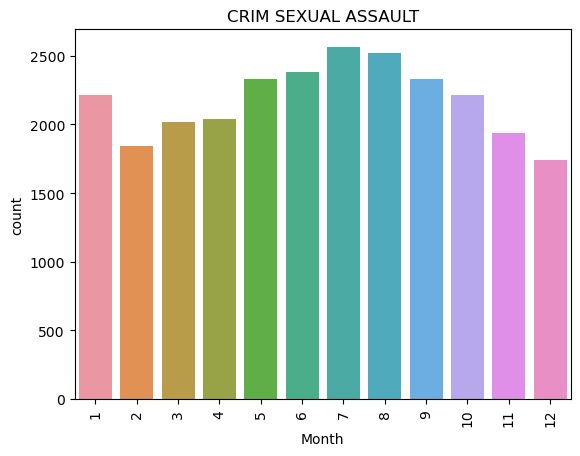

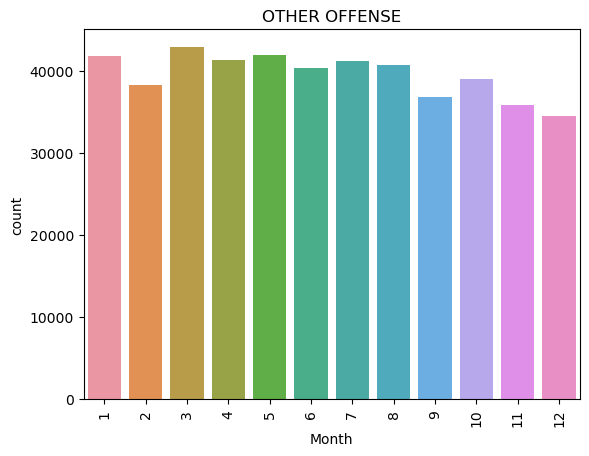

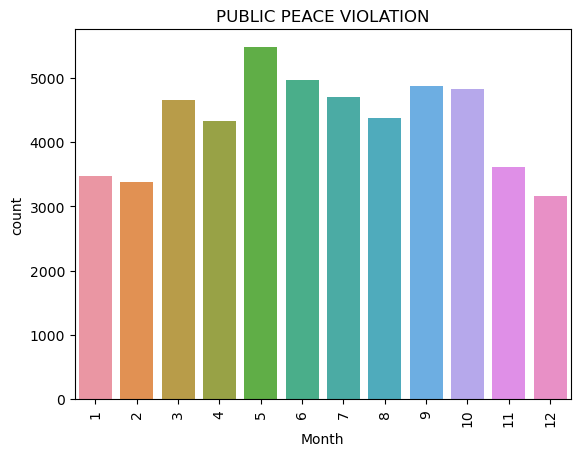

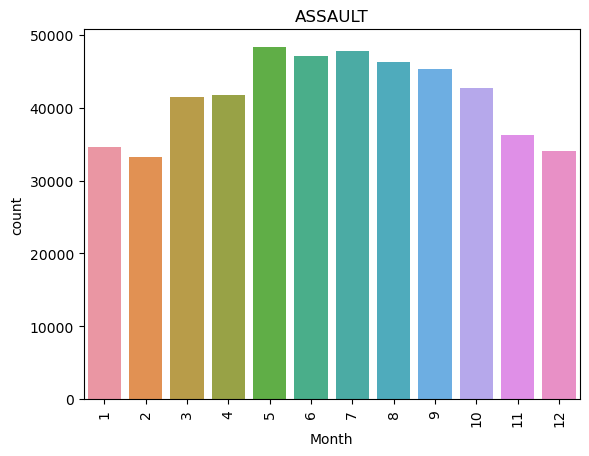

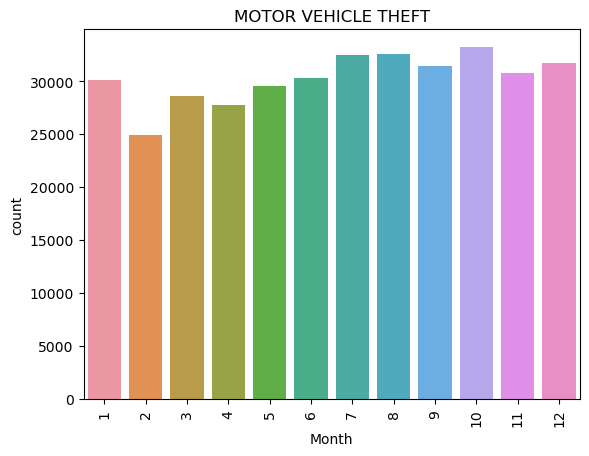

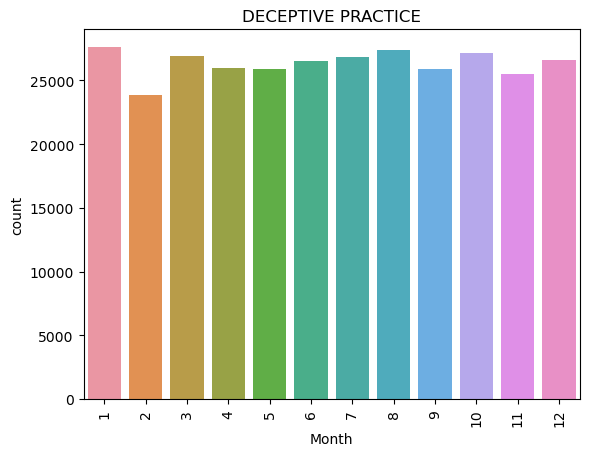

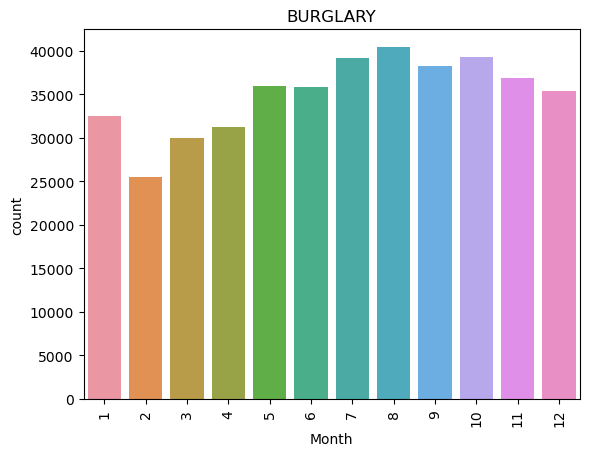

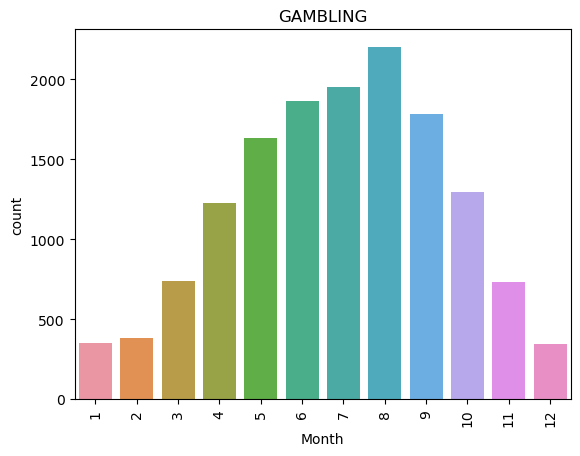

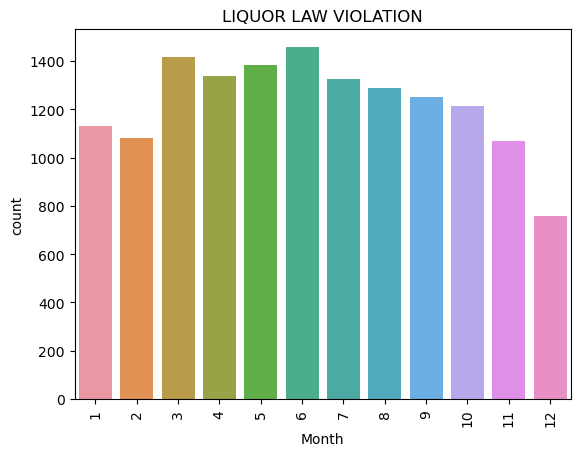

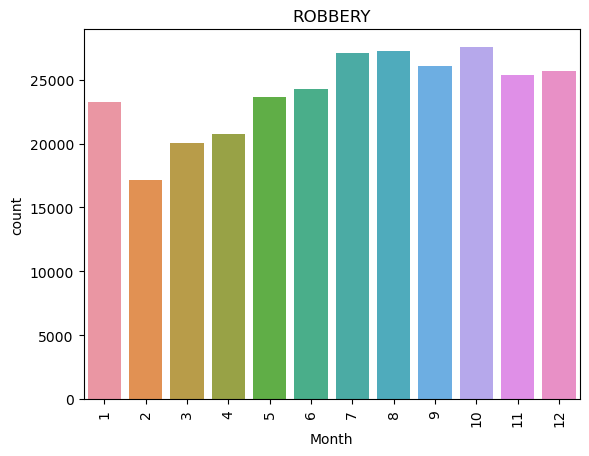

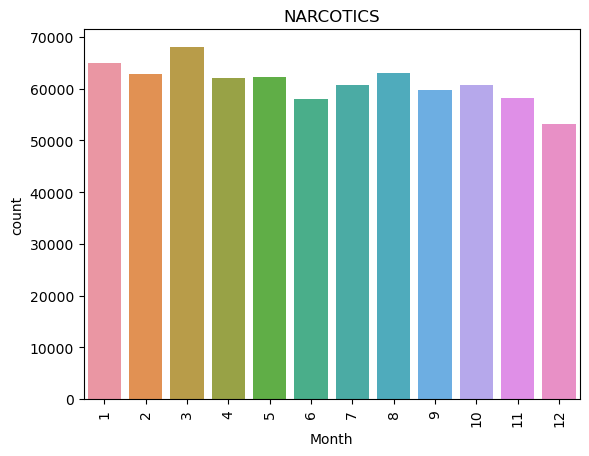

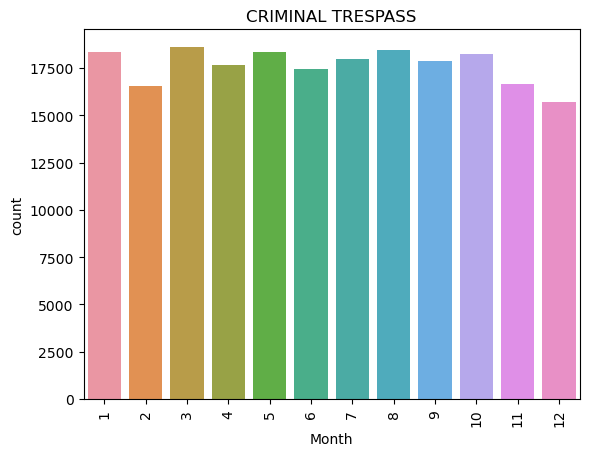

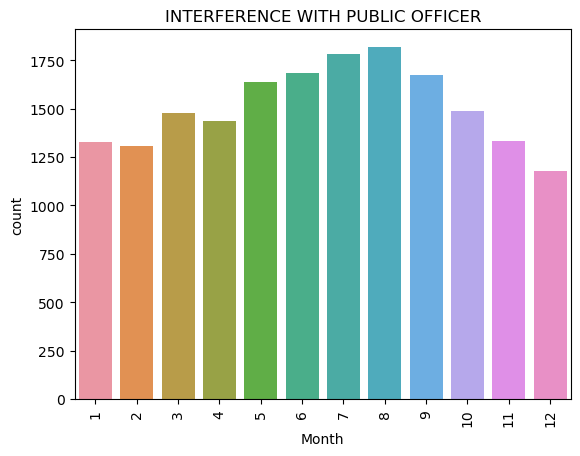

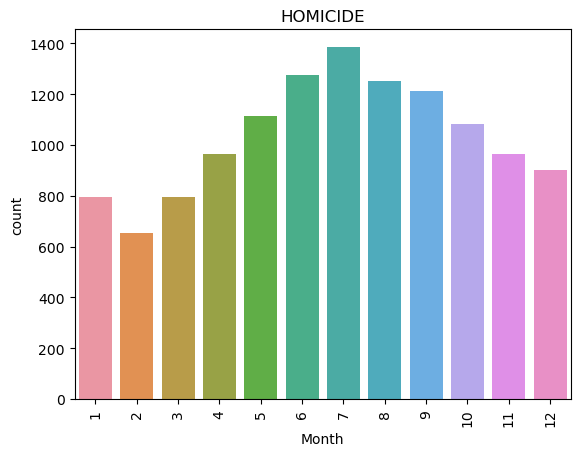

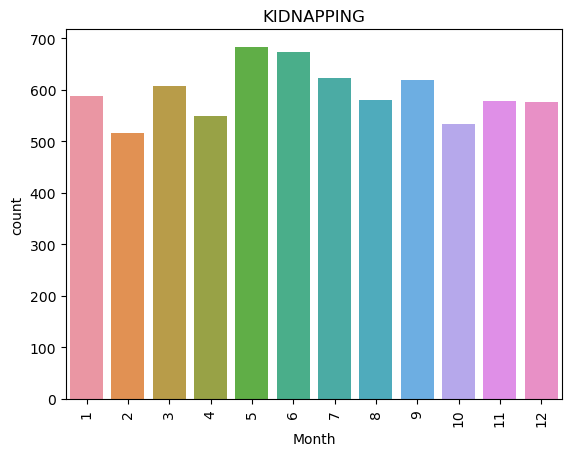

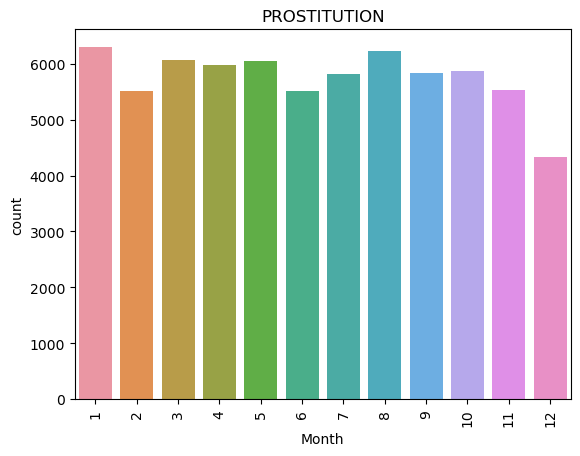

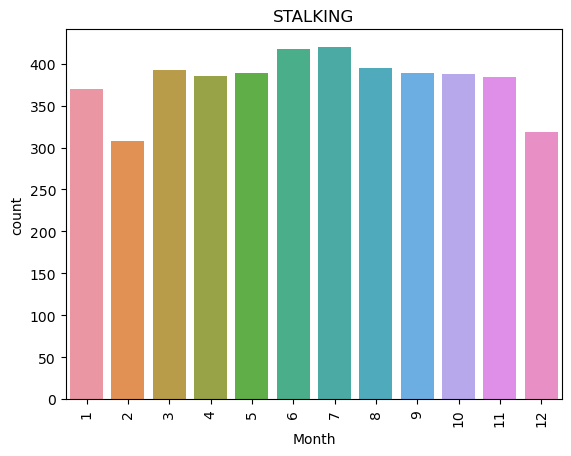

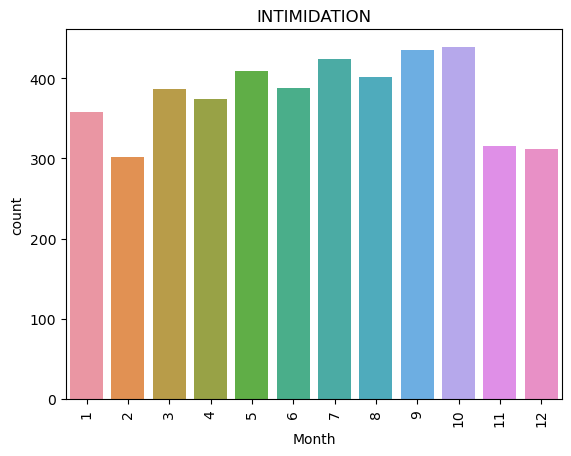

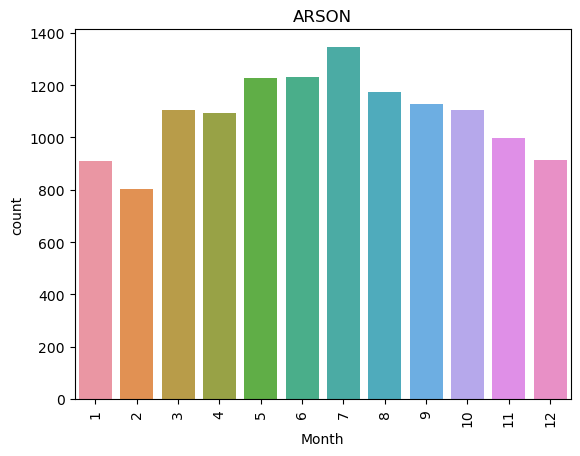

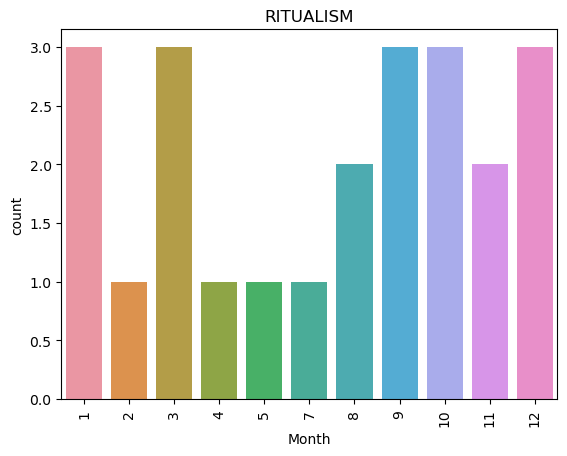

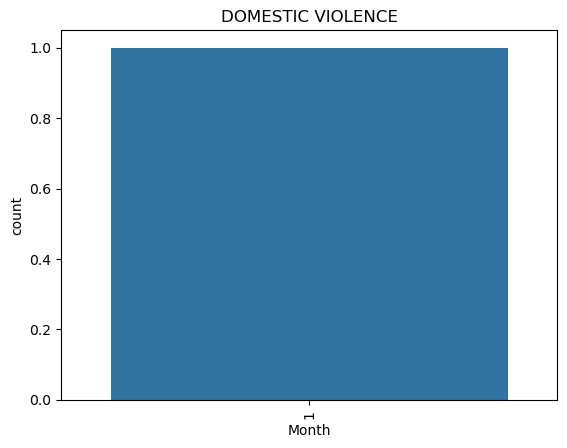

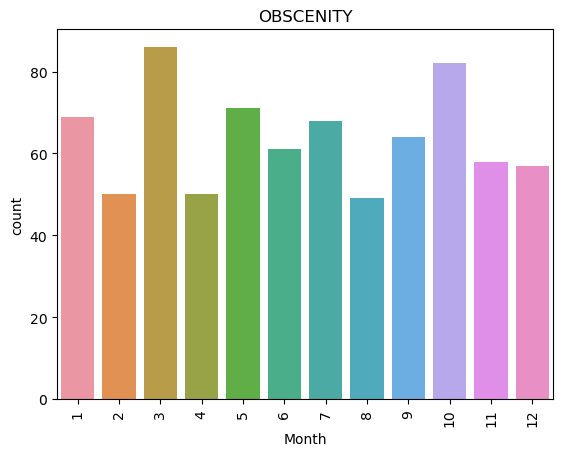

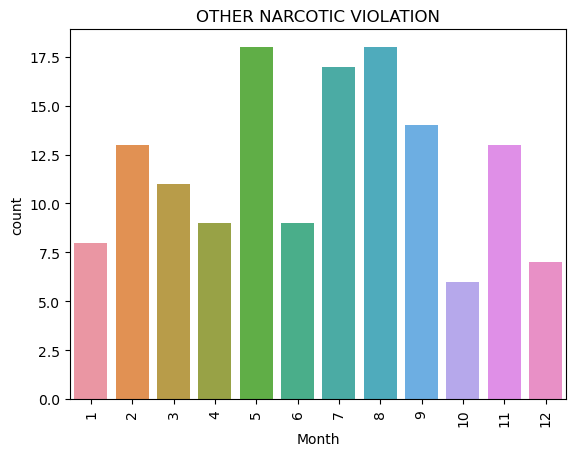

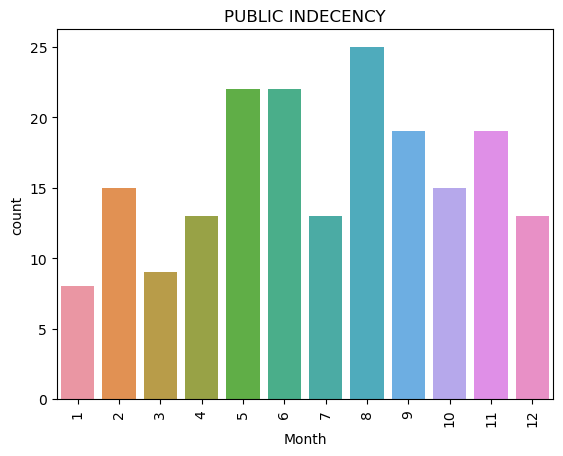

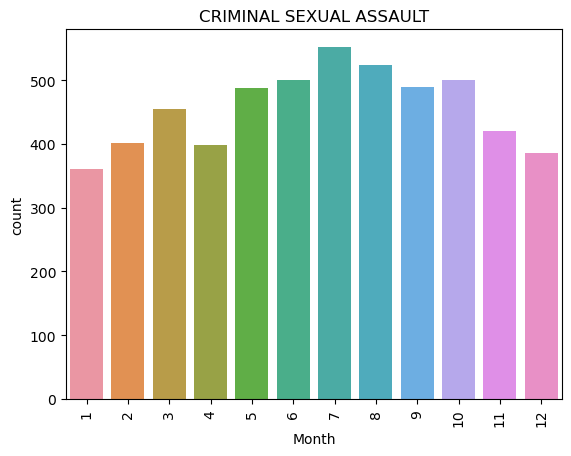

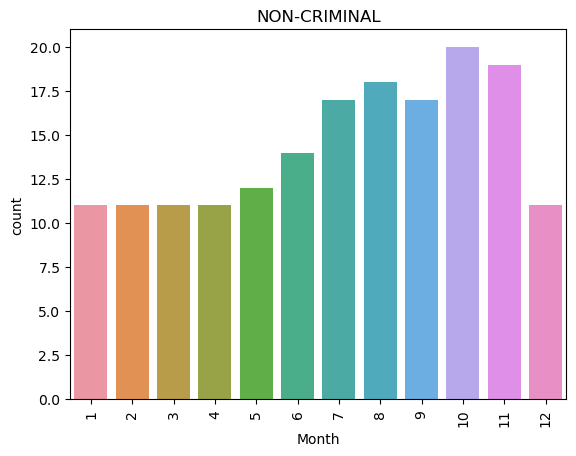

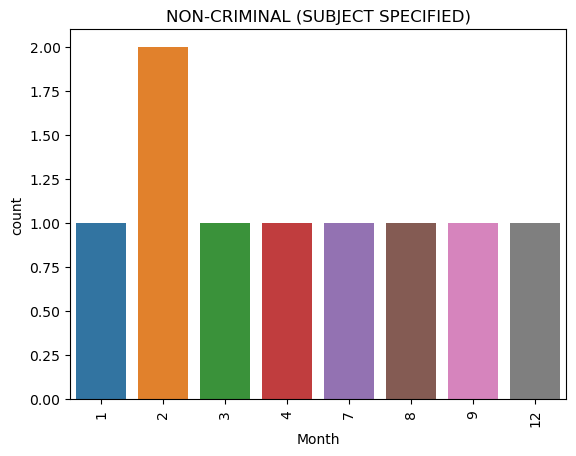

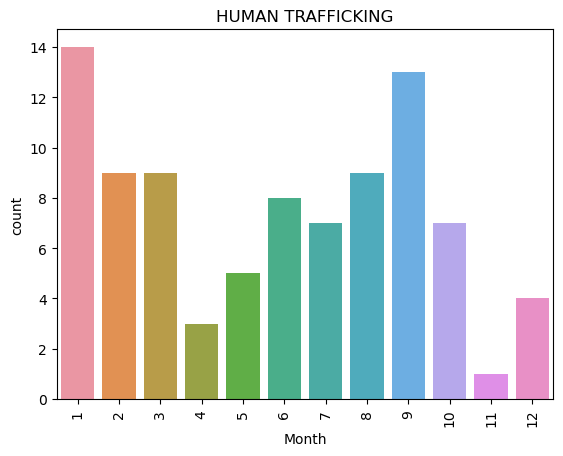

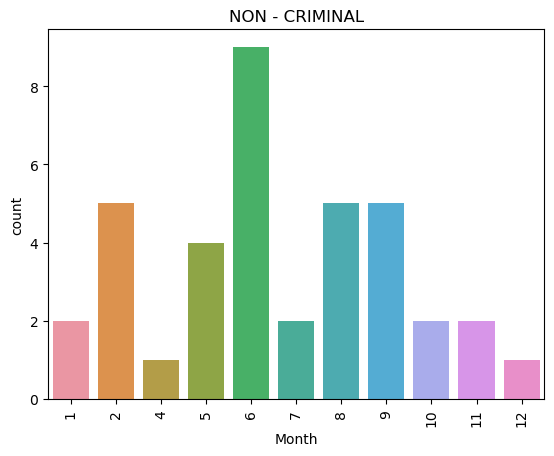

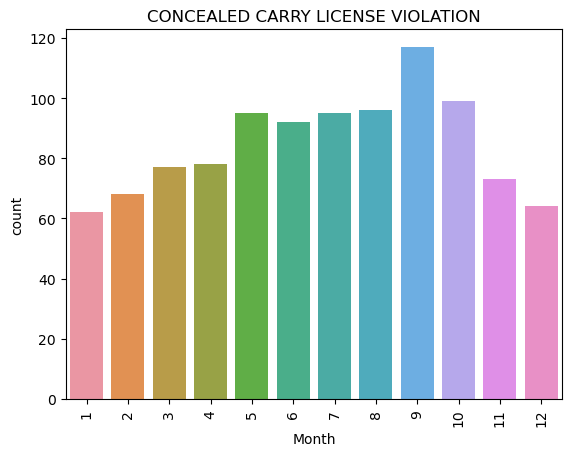

In [40]:
for key in crimes.keys():
    plt.figure()
    ax = sns.countplot(data=crimes[key], x="Month").set(title = f"{key}")
    
    plt.xticks(rotation = 90)

## July has the most Crime and February has the Least amount of Crime.

### However, multiple crimes do not follow this trend. Crimes that do not have peaks in July include:

- Weapons Violations
- Offenses involving Children
- Other Offenses
- Public Peace Violations
- Assault
- Motor Vehicle Theft
- Deceptive Practice
- Burglary
- Gambling
- Liquor Law Violations
- Narcotics
- Interference with Public Officers
- Kidnapping
- Prostitution
- Intimidation
- Obscenity
- Public Indecency
- Human Trafficking
- Concealed Carry Violations

### Crimes that do not have low in February include:

- Other Offenses,
- Public Peace Violations
- Gambling
- Liquor Law Violations
- Narcotics
- Interference with Public Officers
- Prostitution
- Public Indecency
- Human Trafficking